In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
# matplotlib.rcParams['figure.dpi']= 200
import altair as alt
pd.set_option('display.max_rows', 500)
import numpy as np
import plotnine as p9
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from altair_saver import save

In [217]:
author = pd.read_csv('../data/ht_class/ht_cleaned_author_df.csv')
paper = pd.read_csv('../data/ht_class/ht_cleaned_paper_df.csv')

### Number of countries by year

In [218]:
## How many counries in total
countries = author['Affiliation Country Code']
len(list(set(countries)))

42

In [219]:
# how many rows miss openalex author id
author[author['OpenAlex Author ID'].isnull()].shape[0]

117

In [220]:
author[author.Year == 1990].shape[0]

119

In [221]:
year_1990_author = author[author.Year == 1990]
author_id_1990 = year_1990_author['OpenAlex Author ID'].tolist()
dic = dict(Counter(author_id_1990))
twice_1990 = [x for x in dic.keys() if dic[x] > 1][0]
year_1990_author[year_1990_author['OpenAlex Author ID'] == twice_1990]
# This author appeared twice in 1990

,Year,DOI,Title,Number of Authors,Author Position,Author Name,OpenAlex Author ID,Affiliation Name,Affiliation Country Code,Affiliation Type,Binary Type,Cross-type Collaboration,International Collaboration
7746,1990,10.1109/VISUAL.1990.146385,A journey into the fourth dimension,2.0,2.0,E.S. Panduranga,https://openalex.org/A2302757246,department of computer sciences johns hopkins ...,US,education,education,False,True
9955,1990,10.1109/VISUAL.1990.146393,A numerical method for rendering spherical ref...,3.0,2.0,E.S. Panduranga,https://openalex.org/A2302757246,department of computer sciences johns hopkins ...,US,education,education,False,False


In [222]:
cntry_num_by_year = author.groupby('Year')['Affiliation Country Code'].nunique().reset_index(
    name='number of participating countries')
cntry_num_by_year.head()

,Year,number of participating countries
0,1990,5
1,1991,8
2,1992,12
3,1993,12
4,1994,9


In [223]:
cntry_num_by_year.tail()

,Year,number of participating countries
27,2017,21
28,2018,18
29,2019,17
30,2020,24
31,2021,27


In [224]:
cntry_num_by_year[cntry_num_by_year.Year.isin([1994, 1995, 2003, 2004,2007,2008])]

,Year,number of participating countries
4,1994,9
5,1995,11
13,2003,15
14,2004,16
17,2007,19
18,2008,20


In [225]:
year_1990_author = author[author.Year == 1990]

In [226]:
Counter(year_1990_author['Affiliation Country Code'])

Counter({'US': 109, 'DE': 4, 'AU': 3, 'CA': 1, 'FR': 2})

### Top countries

In [227]:
dic = dict(Counter(author['Affiliation Country Code']).most_common(5))
top_five = list(dic.keys())
df = pd.DataFrame(dic.items(), columns = ['country', 'count'])
df['ratio'] = round(df['count'] / 12413, 3)
df

,country,count,ratio
0,US,6556,0.528
1,DE,1653,0.133
2,CN,1018,0.082
3,AT,525,0.042
4,CA,428,0.034


In [228]:
df.ratio.sum()

0.8190000000000001

In [229]:
dic = dict(Counter(author['Affiliation Country Code']).most_common(10))
top_10 = list(dic.keys())
df = pd.DataFrame(dic.items(), columns = ['country', 'count'])
df['ratio'] = round(df['count'] / 12413, 3)
df

,country,count,ratio
0,US,6556,0.528
1,DE,1653,0.133
2,CN,1018,0.082
3,AT,525,0.042
4,CA,428,0.034
5,GB,428,0.034
6,FR,314,0.025
7,NL,308,0.025
8,CH,164,0.013
9,AU,145,0.012


In [230]:
df.ratio.sum()

0.928

#### Redistributions

In [231]:
# prepare for timeseries plot
cntry_ts_prop = []
for group in author.groupby('Year'):
    year = group[0]
    year_total = group[1].shape[0]
    group[1]['cntry new'] = group[1]['Affiliation Country Code'].apply(
        lambda x: x if x in top_five else 'Other'
    )
    for cntry_group in group[1].groupby('cntry new'):
        cntry_code = cntry_group[0]
        cntry_year_total = cntry_group[1].shape[0]
        cntry_prop = cntry_year_total / year_total
        cntry_ts_prop.append((year, cntry_code, cntry_year_total, cntry_prop))

In [232]:
cntry_ts_prop_df = pd.DataFrame(
    list(cntry_ts_prop), columns=['year', 'country', 'year total', 'ratio']) 
cntry_ts_prop_df.replace({'CA': 'Canada',
                          'DE': 'Germany',
                          'CN': 'China',
                          'AT': 'Austria',
                         }, inplace = True)
cntry_ts_prop_df.head()

,year,country,year total,ratio
0,1990,Canada,1,0.008403
1,1990,Germany,4,0.033613
2,1990,Other,5,0.042017
3,1990,US,109,0.915966
4,1991,Germany,3,0.023438


In [233]:
cntry_ts_prop_df[cntry_ts_prop_df.year.isin([2016, 2017])]

,year,country,year total,ratio
137,2016,Austria,23,0.042672
138,2016,Canada,20,0.037106
139,2016,China,55,0.102041
140,2016,Germany,70,0.129870
141,2016,Other,132,0.244898
142,2016,US,239,0.443414
143,2017,Austria,44,0.081633
144,2017,Canada,17,0.031540
145,2017,China,74,0.137291
146,2017,Germany,70,0.129870


#### Addressing the issue of Hong Kong

In [234]:
author[author['Affiliation Country Code'] == 'CN'].shape[0]

1018

In [235]:
def check_substring(substring_list, string_to_check):
    true_false_list = []
    for i in substring_list:
        true_false_list.append(i in string_to_check)
    return True in true_false_list

In [236]:
hk_list = ['Hong Kong', 'hong kong', 'HK', 'hk']

In [237]:
# author['Country Code New'] = author.apply(
#     lambda row: 'HK' if check_substring(
#         hk_list, row['Affiliation Name']) else row['Affiliation Country Code'], axis = 1
# )

In [240]:
# now i got it: in np.where, the condition should be a list or array!
cntry_code_new = np.where(
    [check_substring(hk_list, i) for i in author['Affiliation Name']],
    'HK',
    author['Affiliation Country Code']
)

In [243]:
kwargs = {'Country Code New': cntry_code_new}
author = author.assign(**kwargs)

In [245]:
# 258 out of 1018 authors coded as coming from CN actually came from Hong Kong
# One author actually came from Hong Kong was mislabelled as coming from YE
hk_author = author[author['Country Code New'] == 'HK']
hk_author.shape[0]

258

<AxesSubplot:xlabel='Year', ylabel='count'>

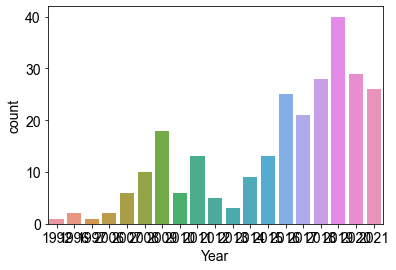

In [246]:
sns.countplot(x = hk_author.Year)

In [247]:
dic = dict(Counter(author['Country Code New']).most_common(5))
list(dic.keys())
df = pd.DataFrame(dic.items(), columns = ['country', 'count'])
df['ratio'] = round(df['count'] / 12413, 3)
df

,country,count,ratio
0,US,6556,0.528
1,DE,1653,0.133
2,CN,760,0.061
3,AT,525,0.042
4,CA,428,0.034


In [248]:
# top_five = ['US', 'DE', 'CN', 'AT', 'CA']
top_five = list(dic.keys())
author[author['Country Code New'].isin(top_five)].shape[0] / author.shape[0]

0.7983585452204699

In [249]:
### TOP 10
dic2 = dict(Counter(author['Country Code New']).most_common(10))
list(dic2.keys())
# top_ten = ['US', 'DE', 'CN', 'AT', 'CA', 'GB', 'FR', 'NL', 'CH', 'AU']
top_ten = list(dic2.keys())
author[author['Affiliation Country Code'].isin(top_ten)].shape[0] / author.shape[0]

0.916800772449308

In [250]:
cntry_ts_prop = []
for group in author.groupby('Year'):
    year = group[0]
    year_total = group[1].shape[0]
    group[1]['cntry new'] = group[1]['Country Code New'].apply(
        lambda x: x if x in top_five else 'Other'
    )
    for cntry_group in group[1].groupby('cntry new'):
        cntry_code = cntry_group[0]
        cntry_year_total = cntry_group[1].shape[0]
        cntry_prop = cntry_year_total / year_total
        cntry_ts_prop.append((year, cntry_code, cntry_year_total, cntry_prop))

cntry_ts_prop_df = pd.DataFrame(
    list(cntry_ts_prop), columns=['year', 'country', 'year total', 'ratio']) 

In [251]:
list(set(cntry_ts_prop_df.country.tolist()))

['Other', 'AT', 'DE', 'CA', 'US', 'CN']

In [252]:
cntry_ts_prop_df[cntry_ts_prop_df.year >= 2016]
# China overtook DE in 2019 as the second largest source of authors

,year,country,year total,ratio
134,2016,AT,23,0.042672
135,2016,CA,20,0.037106
136,2016,CN,30,0.055659
137,2016,DE,70,0.129870
138,2016,Other,157,0.291280
139,2016,US,239,0.443414
140,2017,AT,44,0.081633
141,2017,CA,17,0.031540
142,2017,CN,53,0.098330
143,2017,DE,70,0.129870


Text(0.5, 1.0, 'number of authros from participating countries over the past 32 years')

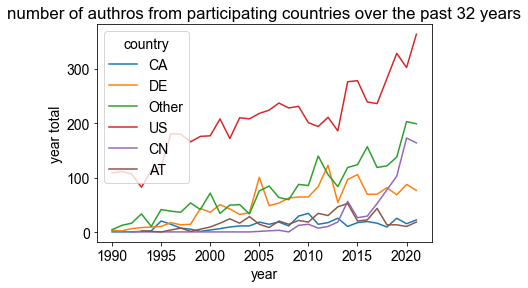

In [253]:
g = sns.lineplot(x='year', y='year total', hue='country', data = cntry_ts_prop_df)
g.set_title('number of authros from participating countries over the past 32 years')

### Involving US authors

In [254]:
Counter(paper['With US Authors'])

Counter({True: 2095, False: 1145})

In [255]:
2113/paper.shape[0]

0.6521604938271605

In [256]:
def get_total_and_ratio_by_year(DF, subgroup_par):
    tuples = []
    for group in DF.groupby('Year'):
        year = group[0]
        total = group[1].shape[0]
        for subgroup in group[1].groupby(subgroup_par):
            subtype = 'Yes' if subgroup[0] else 'No'
            count = subgroup[1].shape[0]
            ratio = count / total
            tuples.append((year, subtype, count, ratio))
    dff = pd.DataFrame(
        list(tuples), columns=['year', 'type', 'count', 'ratio']) 
    return dff

In [257]:
withus_authors = get_total_and_ratio_by_year(paper, 'With US Authors')
withus_authors.rename(columns = {
#     'year': 'Year',
    'type': 'With US Authors', 
    'ratio': 'Ratio'}, inplace=True)
withus_authors['Year'] = pd.to_datetime(withus_authors['year'], format='%Y')
withus_authors.head(10)

,year,With US Authors,count,Ratio,Year
0,1990,No,6,0.115385,1990-01-01
1,1990,Yes,46,0.884615,1990-01-01
2,1991,No,6,0.120000,1991-01-01
3,1991,Yes,44,0.880000,1991-01-01
4,1992,No,11,0.207547,1992-01-01
5,1992,Yes,42,0.792453,1992-01-01
6,1993,No,17,0.309091,1993-01-01
7,1993,Yes,38,0.690909,1993-01-01
8,1994,No,8,0.150943,1994-01-01
9,1994,Yes,45,0.849057,1994-01-01


In [258]:
withus_authors[withus_authors.year.isin([2010, 2011, 2021])]

,year,With US Authors,count,Ratio,Year
40,2010,No,41,0.376147,2010-01-01
41,2010,Yes,68,0.623853,2010-01-01
42,2011,No,63,0.529412,2011-01-01
43,2011,Yes,56,0.470588,2011-01-01
62,2021,No,69,0.405882,2021-01-01
63,2021,Yes,101,0.594118,2021-01-01


In [259]:
withus_authors[withus_authors['With US Authors'] == 'Yes']['count'].sum()

2095

## Affiliation types

In [260]:
tuples = []
for group in author.groupby('Year'):
    year = group[0]
    total = group[1].shape[0]
    for subgroup in group[1].groupby('Binary Type'):
        aff_type = subgroup[0]
        count = subgroup[1].shape[0]
        ratio = count / total
        tuples.append((year, aff_type, count, ratio))

In [261]:
binary_type_df = pd.DataFrame(list(tuples), columns=['year', 'type', 'count', 'ratio']) 
binary_type_df['Year'] = pd.to_datetime(binary_type_df['year'], format='%Y')
binary_type_df.replace({
    'education': 'Education',
    'non-education': 'Non-Education'
}, inplace= True)
binary_type_df.head(10)

,year,type,count,ratio,Year
0,1990,Education,71,0.596639,1990-01-01
1,1990,Non-Education,48,0.403361,1990-01-01
2,1991,Education,65,0.507812,1991-01-01
3,1991,Non-Education,63,0.492188,1991-01-01
4,1992,Education,55,0.413534,1992-01-01
5,1992,Non-Education,78,0.586466,1992-01-01
6,1993,Education,64,0.496124,1993-01-01
7,1993,Non-Education,65,0.503876,1993-01-01
8,1994,Education,86,0.627737,1994-01-01
9,1994,Non-Education,51,0.372263,1994-01-01


In [262]:
binary_type_df.tail(5)

,year,type,count,ratio,Year
59,2019,Non-Education,112,0.165192,2019-01-01
60,2020,Education,664,0.837327,2020-01-01
61,2020,Non-Education,129,0.162673,2020-01-01
62,2021,Education,704,0.833136,2021-01-01
63,2021,Non-Education,141,0.166864,2021-01-01


In [265]:
# edu and non-edu within us
dic = dict(Counter(author[author['Affiliation Country Code'] == 'US']['Binary Type']))
dff1 = pd.DataFrame(dic.items(), columns = ['type', 'count'])
dff1['ratio'] = dff1['count'] / dff1['count'].sum()
dff1

,type,count,ratio
0,education,4690,0.715375
1,non-education,1866,0.284625


In [269]:
# edu and non-edu outside of the us
dic = dict(Counter(author[author['Affiliation Country Code'] != 'US']['Binary Type']))
dff2 = pd.DataFrame(dic.items(), columns = ['type', 'count'])
dff2['ratio'] = dff2['count'] / dff2['count'].sum()
dff2

,type,count,ratio
0,education,4717,0.803304
1,non-education,1155,0.196696


In [270]:
# the proportion of nonedu from us against all nonedu
dff1.iloc[1,1] / (dff1.iloc[1,1] + dff2.iloc[1,1])

0.6176762661370407

In [273]:
# the proportion of nonedu from outside the us against all nonedu
dff2.iloc[1,1] / (dff1.iloc[1,1] + dff2.iloc[1,1])

0.38232373386295926

In [271]:
# the proportion of edu against all affs when we only consider outside the us
dff2.iloc[0,1] / (dff2.iloc[0,1] + dff2.iloc[1,1])

0.8033038147138964